# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Employee_productivity.csv")


df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 non-null    float64
 2   ProductivityScore    300 non-null    float64
 3   Department           300 non-null    object 
 4   YearsAtCompany       300 non-null    int64  
 5   TeamMeetingsPerWeek  300 non-null    int64  
 6   DeskLocation         300 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ KB


,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


++++Linear Correlations++++
Years at Company    : R2 = 0.0004


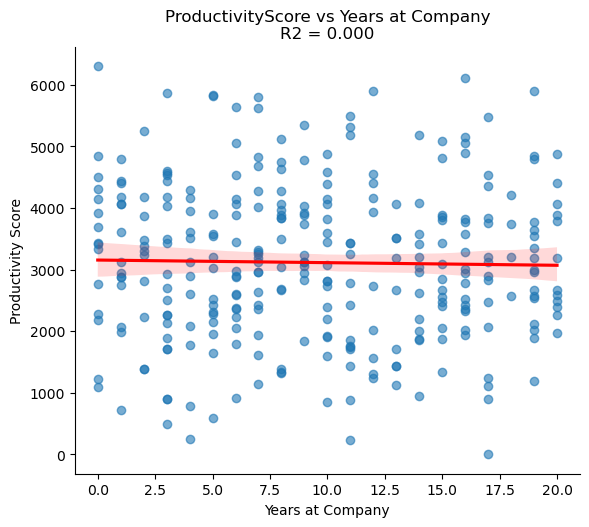

Hours Worked        : R2 = 0.0026


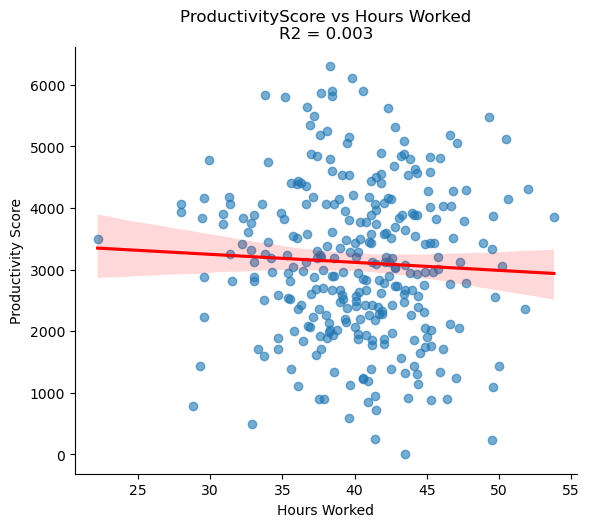

Focus               : R2 = 0.6777


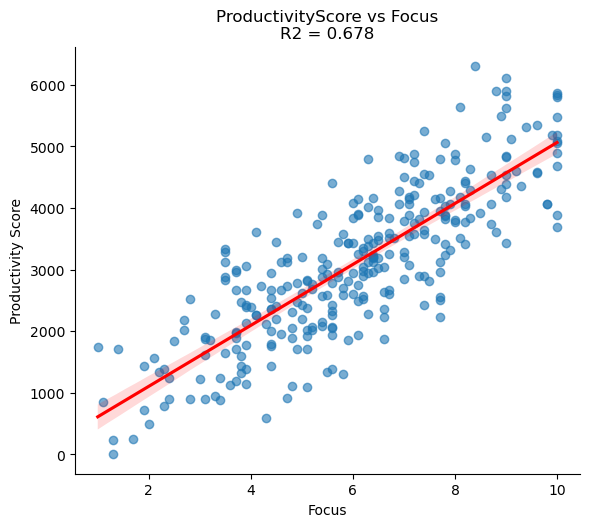


Strongest linear relationship: Focus (R2 = 0.678)



In [21]:
prodCol = "ProductivityScore"
yearsCol = "YearsAtCompany"
hoursCol = "HoursWorked"
focusCol = "FocusScore"

features = {
    "Years at Company": yearsCol,
    "Hours Worked": hoursCol,
    "Focus": focusCol
}

r2Values = {}

print("++++Linear Correlations++++")

for label, col in features.items():
    data = df[[col,prodCol]].dropna()
    correlation = data[col].corr(data[prodCol])
    r2 = correlation**2
    r2Values[label] = r2
    print(f"{label:<20}: R2 = {r2:.4f}")

    sns.lmplot(x=col, y=prodCol, data=data, height=5, aspect=1.2,
               line_kws={"color":"red"}, scatter_kws={"alpha":0.6})
    plt.title(f"{prodCol} vs {label}\nR2 = {r2:.3f}")
    plt.xlabel(label)
    plt.ylabel("Productivity Score")
    plt.show()

best = max(r2Values.items(), key=lambda kv:kv[1])
print(f"\nStrongest linear relationship: {best[0]} (R2 = {best[1]:.3f})\n")



# Answer 1
The focus level correlates most closely with productivity and it's not even close. With an R2 value of 0.678, it is the main factor in productivity.

++++Correlation with Productivity (Numeric Features)++++
HoursWorked         : R2 = 0.0026
FocusScore          : R2 = 0.6777
YearsAtCompany      : R2 = 0.0004
TeamMeetingsPerWeek : R2 = 0.0542


<Figure size 800x600 with 0 Axes>

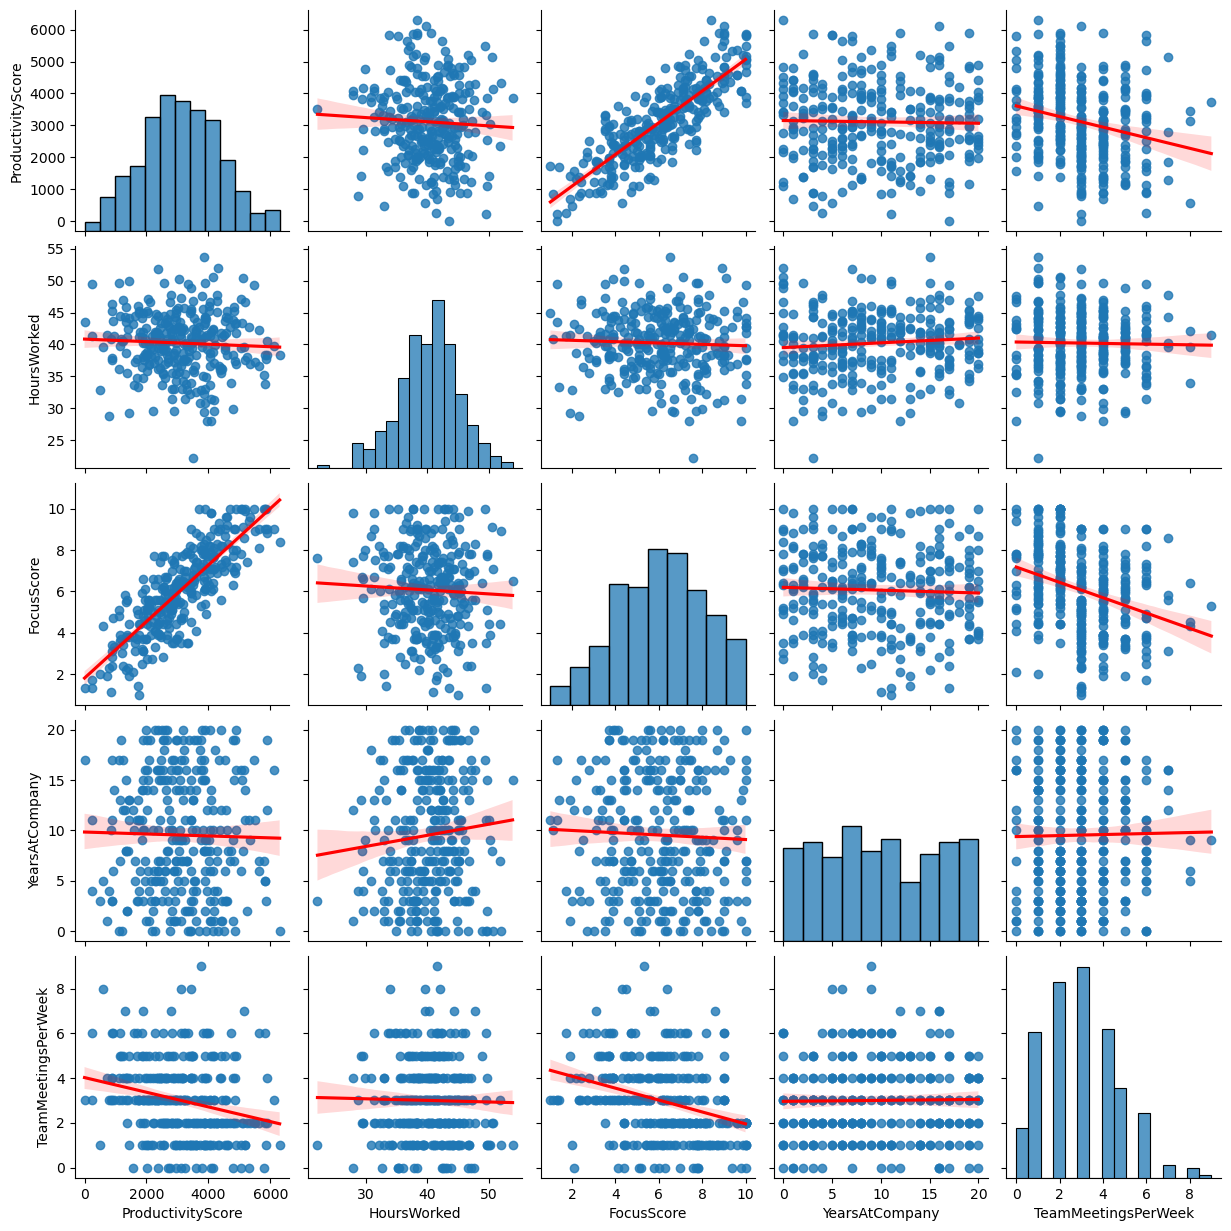

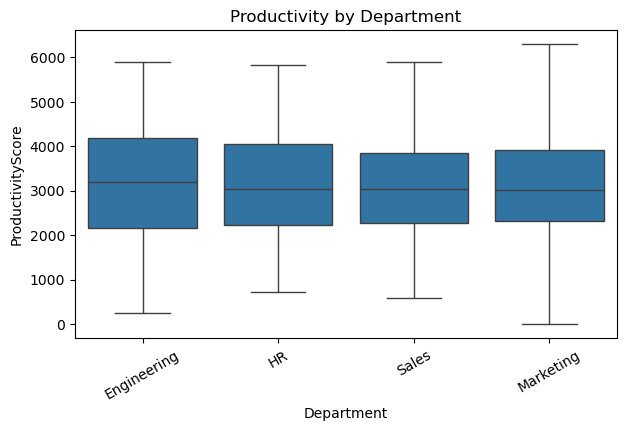

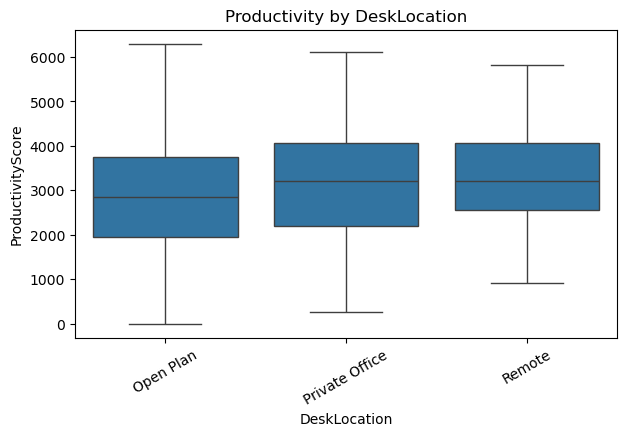

In [27]:
numericCols = ["HoursWorked", "FocusScore", "ProductivityScore", "YearsAtCompany", "TeamMeetingsPerWeek"]
corrMatrix = df[numericCols].corr()

print("++++Correlation with Productivity (Numeric Features)++++")
for col in numericCols:
    if col != prodCol:
        r2 = corrMatrix.at[col,prodCol]**2
        print(f"{col:<20}: R2 = {r2:.4f}")

plt.figure(figsize=(8,6))
sns.pairplot(df[["ProductivityScore", "HoursWorked", "FocusScore",
                 "YearsAtCompany", "TeamMeetingsPerWeek"]],
             kind="reg", plot_kws={"line_kws": {"color": "red"}})
plt.show()


catCols = ["Department", "DeskLocation"]
for col in catCols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=col, y=prodCol, data=df)
    plt.title(f"Productivity by {col}")
    plt.xticks(rotation=30)
    plt.show()
        

# Answer #2
We didn't look at the number of meetings per week in the first section, but this is actually the second highest correlation to productivity, according to R2 score, but is negatively correlated. While productivity increases while focus goes up, it drops with a greater number of meetings in a week. It makes sense: if you spend more time talking about things, you never get things done. 

Also, as the employees stated, working in the open plan area shows an obvious decline in productivity. While the average is similar between a private office and remote workers (with remote having a higher floor), the open plan workers are less productive on average, have a lower ceiling and a lower floor than their officed (private or home) colleagues.

# Answer #3
From the data, the most feature most correlated to productivity is the focus score, so we should be focusing our efforts on improving that as much as possible. While we don't see everything that affects the focus score, we do know there are 3 main things we can look at: hours worked, meetings per week, and desk location. Focus score, as we can see in the scatter plot grid, is correlated with limited hours and limited meetings. To promote more of this, we should encourage all meeting organizers to ask themselves before scheduling yet another meeting, if it's something that could be an email instead. While we want to make product to fill the demands of our customers, we should discourage mandatory overtime and encourage voluntary overtime, only when necessary. This way, hopefully the employees who are more productive with longer hours will be the ones to accept the overtime. Finally, we should explore the feasibility to move to a fully remote model while keeping option of on site work available. It not only would show a increase in productivity, it also tells our employees that we trust them to not be under the watchful eye of a manager at all times, which can improve morale, thus increasing productivity again.